# 1 - Aria Plant Nutrition Prediction
Tujuan dari proyek ini adalah untuk melakukan prediksi terhadap Nutrisi Tanaman Berdasarkan 8 Variabel dan Asal Sampel. 
Dengan membandingkan perfroma beberapa algoritma machine learning seperti Logistik Regresi, Ridge Regresi, Support Vector Machine, Knearest Neighbor, Random Forest, dan Gradien Boosting.

Setelah dilakukan analisis, model yang paling akurat yaitu Ridge Regression Dengan Polynominal Transform dan digunakan untuk prediksi data inference

# 2 - Introduction

Nama : Dicky Librata Sembiring 

Batch : FTDS-003

Dataset : aria_data.xlsx

Objective : Memprediksi Nutrisi Tanaman Berdasarkan 8 variabel dan type sample

# 3 - External Link
Model Deployment
- Hugging Face : https://huggingface.co/spaces/barentz96/Plant_Nutrition

# 4 - Working Area

## 4.1 Import Libraries

Berikut adalah library python yang digunakan

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sdv.evaluation import evaluate

import phik
from phik import resources, report

import pickle
from feature_engine.outliers import Winsorizer

import warnings
warnings.simplefilter('ignore', UserWarning)

## 4.2 Data Loading

Selanjutnya dilakukan loading dataset. Kemudian beberapa eksplorasi sederhana seperti melihat jumlah baris dan kolom data, nama dan type data masing - masing kolom, serta basic info dari data yang telah di load

Dari sumber dataset, penulis memperoleh informasi mengenai masing - masing column sebagai berikut:
- target : informasi nutrisi tumbuhan yang akan di prediksi
- V1 - V8 : Variabel yang berisi informasi untuk memprediksi nutrisi tanaman
- sample_type : Informasi mengenai labortorium dari sampel

In [2]:
# Load Dataset
df_ori = pd.read_excel('aria_data.xlsx')

# Setting display pandas dataframe showing all columns
pd.set_option('display.max_columns', None) 
# Setting format floating to 2 decimal
pd.options.display.float_format = '{:.2f}'.format

Ini adalah tampilan 5 baris awal dan akhir dari dataset yang telah di load

In [3]:
# Duplicate Dataset
# Dilakukan agar data set original tidak berubah apabila dilakukan pengolahan pada data
df = df_ori.copy()
# Showing First 10 Data
df.head()

,target,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
0,4.63,260.60,199.00,391.33,371.73,466.80,273.13,742.07,4047.73,lab 1
1,5.00,263.20,194.60,393.67,348.53,401.80,220.07,712.00,4673.47,lab 1
2,4.91,247.27,205.80,375.47,354.87,419.00,222.13,677.20,4386.80,lab 1
3,4.77,257.94,191.83,368.72,334.67,417.22,195.94,678.56,4588.78,lab 1
4,4.89,258.20,195.73,356.67,333.33,394.60,196.00,677.13,4867.07,lab 1


In [4]:
# Showing 5 Last Data
df.tail()

,target,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
155,4.83,573.25,361.25,643.12,489.81,666.88,355.25,712.31,3943.69,lab 2
156,4.47,678.38,398.12,678.25,541.12,704.00,393.50,788.81,3928.19,lab 2
157,4.63,634.00,382.87,657.47,505.07,719.20,366.60,792.13,3861.20,lab 2
158,4.35,615.31,366.75,642.94,483.69,675.62,359.06,730.12,3859.06,lab 2
159,4.43,575.20,350.27,648.33,495.40,679.80,346.27,718.73,3903.33,lab 2


In [5]:
# Jumlah baris dan kolom serta nama kolom
print(f"Jumlah baris : {df.shape[0]}")
print(f"Jumlah kolom : {df.shape[1]}")

Jumlah baris : 160
Jumlah kolom : 10


Secara keseluruhan dataset memiliki `160 baris` dan `10 kolom`

Kemudian, penulis ingin melihat basic info dan overview dari dataset

In [6]:
# Check basic info Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   target       160 non-null    float64
 1   v1           160 non-null    float64
 2   v2           160 non-null    float64
 3   v3           160 non-null    float64
 4   v4           160 non-null    float64
 5   v5           160 non-null    float64
 6   v6           160 non-null    float64
 7   v7           160 non-null    float64
 8   v8           160 non-null    float64
 9   sample_type  160 non-null    object 
dtypes: float64(9), object(1)
memory usage: 12.6+ KB


Dari basic info diatas, diperoleh informasi sebagai berikut :
- tidak ada kolom yang memiliki missing value.
- target dan 8 variabel memiliki type data float sedangkan tipe sample memiliki tipe data categorical

In [7]:
# Check Numerical Dataset 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
target,160.00,4.73,0.21,4.13,4.60,4.72,4.89,5.26
v1,160.00,389.89,148.67,227.29,268.61,295.16,536.41,678.38
v2,160.00,237.44,70.13,178.80,194.03,204.19,244.72,422.81
v3,160.00,480.57,118.80,348.93,384.42,414.38,591.61,722.31
v4,160.00,394.11,63.06,313.73,353.18,370.74,424.13,558.50
v5,160.00,487.32,100.94,373.33,418.58,456.03,496.47,721.00
v6,160.00,251.45,59.63,189.20,213.00,226.06,262.53,415.38
v7,160.00,714.74,51.15,586.27,678.39,718.83,751.45,853.47
v8,160.00,4456.91,335.04,3725.67,4273.44,4554.77,4700.61,5086.38


Berdasarkan tabel, dapat dilihat beberapa informasi statistikal seperti rata rata, standar deviasi nilai minimun dan maksimum dari dataset

## 4.3 - Exploratory Data Analysis (EDA)

Setelah mengetahui beberapa info dasar, penulis kemudian melakukan eksplorasi lanjutan berupa pengecekan apakah ada data yang memiliki `duplicate` atau `missing value`, cek `distribusi data`, mencari `Insight` yang dapat disimpulkan, serta mencari hubungan setiap kolom terhadap kolom `target`

### Cek Missing Value dan Duplicate
Semua algooritma machine learning tidak dapat bekerja apabila terdapat missing value. Sedangkan data duplicate akan membuat hasil prediksi model menjadi bias. Sehingga dilakukan proses handling missing value dan data dupilkat

In [8]:
# Cek missing value dan duplicated data
num_miss_val = 0
for i in df:
    miss_val = df[i].isnull().sum()
    if miss_val > 0:
        print(i, ' : ', miss_val)
        num_miss_val += 1

if num_miss_val == 0:
    print('Tidak Ada Missing Value')

# cek duplikat data
print(f"Duplicates Data : {df.duplicated().sum()}")

Tidak Ada Missing Value
Duplicates Data : 0


Dari hasil pengecekan diatas diperoleh informasi berikut :
- Tidak ditemukan `missing value` dan data `duplikat` pada dataset

### Analisa Deskriptif

#### Distribusi Setiap Kolom

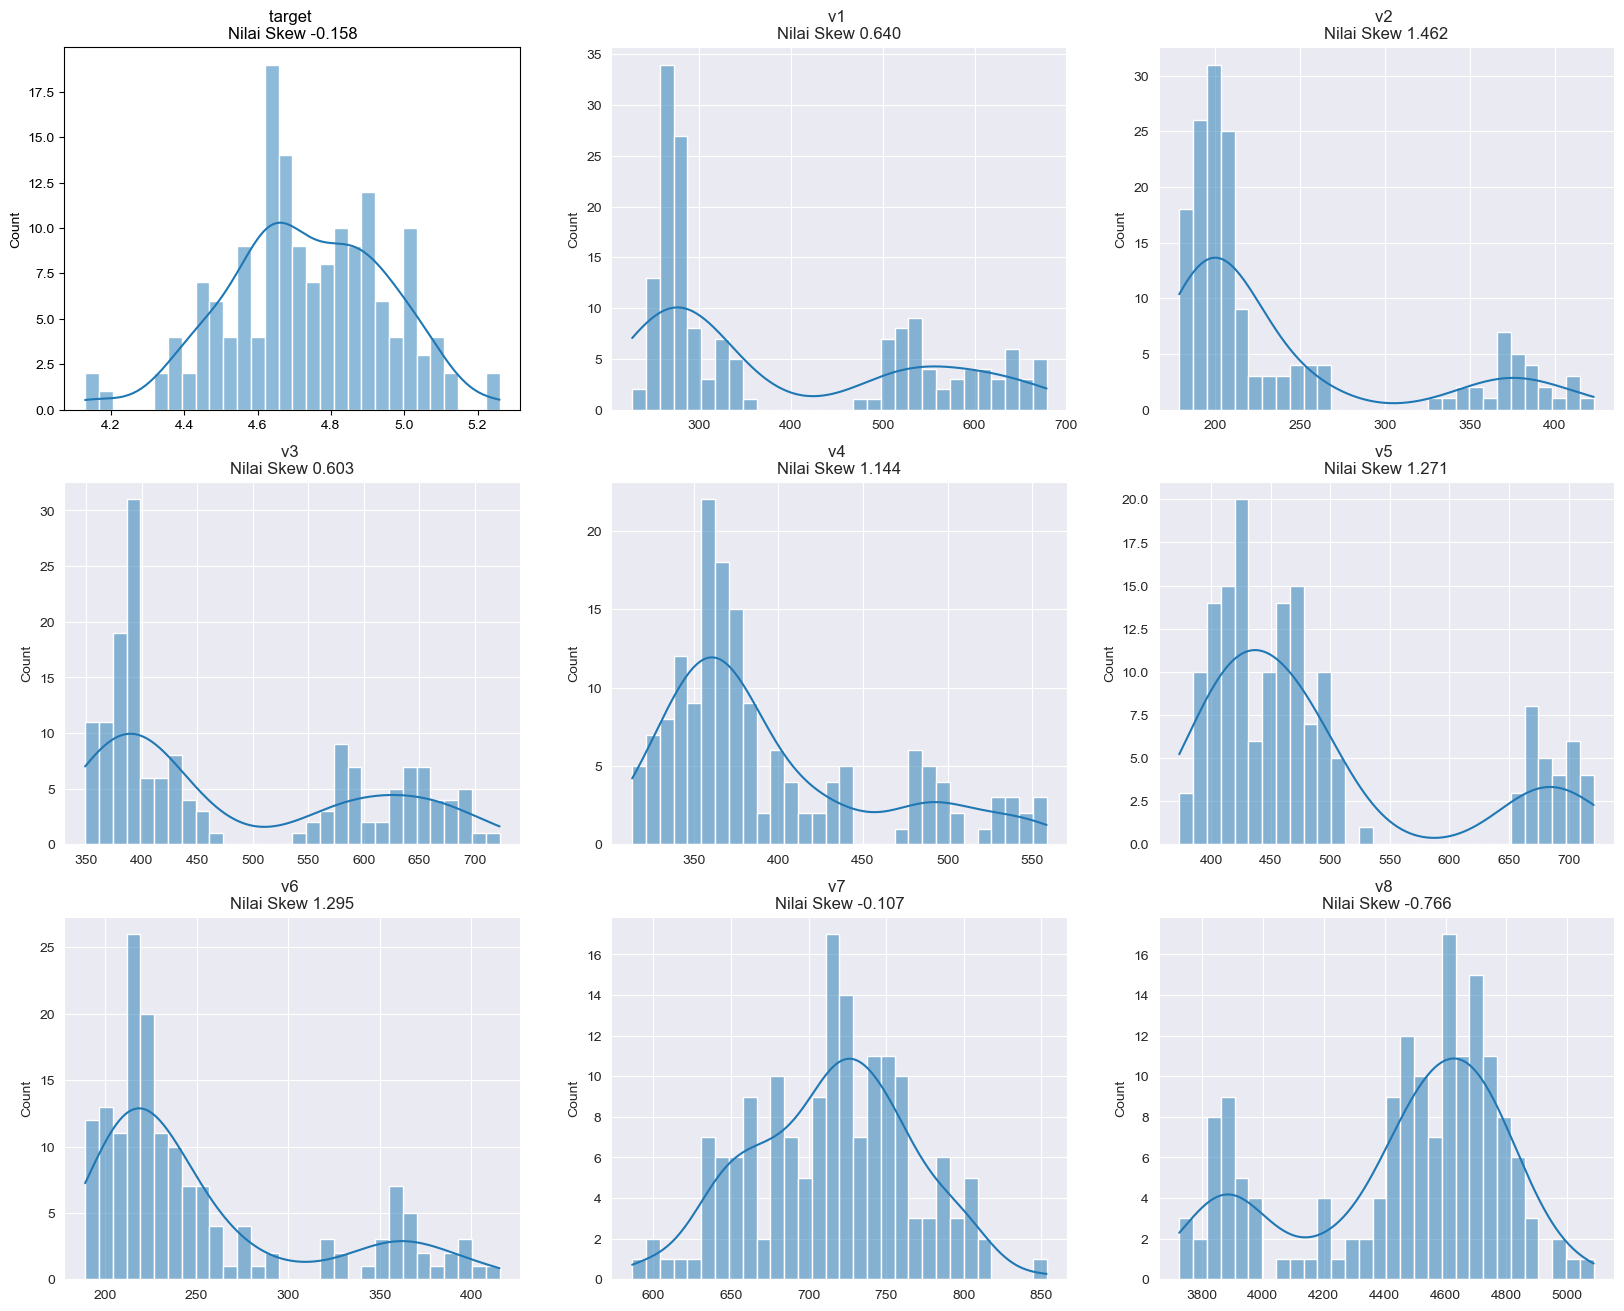

In [9]:
# Membuat figure untuk visualisasi
plt.figure(figsize=[20,16])
count = 331
# looping untuk melakukan plotting dengan seaborn
for i in df.columns[:9]:
    plt.subplot(count)  # axes 
    sns.set_style('darkgrid')
    sns.histplot(data=df, x=i, bins=30, kde=True)   # plot dengan seaborn histplot
    plt.title(f"{i} \nNilai Skew {df[i].skew():.3f}")   # set title
    plt.xlabel('')  # hapus label pada sumbu x
    count += 1  # axes baru untuk plot selanjutnya

Berikut informasi yang dapat dirangkum dari hasil visualisasi menggunakan seaborn dan diagram histrogram
- Kolom yang memiliki distribusi `normal` hanya kolom `target` dan `v7`
- Sedangkan kolom variabel lainnya memiliki distribusi `tidak normal`
    - Pada variabel `v1  - v6` kecendrungan data berkumpul di sebelah kirim `(left skewed)`
    - Sedangkan pada varibel `v8` data berkumpul di sebelah kanan `(right skewed)`

Selain melihat distribusi data target dan variabel v1 - v8, penulis juga melihat distribusi data dari kolom `sample type`.

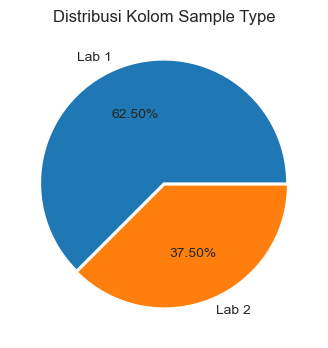

In [10]:
# membuat figure untuk tempat visualisasi
plt.figure(figsize=[4,4])
# plot dengan matplotlib pyplot
plt.pie(x=df['sample_type'].value_counts(),labels=['Lab 1', 'Lab 2'], autopct="%.2f%%", explode=[0.008]*2)
plt.title('Distribusi Kolom Sample Type')
plt.show()

Dengan menggunakan library `matplotlib` dan tipe `pie chart` diperoleh informasi bahwa sampel didominasi dari `laboratorium 1` sebanyak `62.50%` dan sisanya dari `laboratorium 2` sebanyak `37.5%`

#### Rata rata variabel Menurut Tipe Sampel


In [11]:
# groupby dataframe
df_lab = df.groupby('sample_type').mean()
df_lab

,target,v1,v2,v3,v4,v5,v6,v7,v8
sample_type,,,,,,,,,
lab 1,4.72,279.51,204.96,392.77,364.83,429.75,228.12,723.85,4608.48
lab 2,4.75,573.86,291.59,626.92,442.91,583.26,290.33,699.55,4204.30


Selain informasi mengenai persentase data menurut sample, berikut beberapa perbedaan antara sample dari lab 1 dan lab 2
- Lab 1 Memiliki nilai yang `lebih tinggi` dari lab 2 pada variabel berikut ini :
    - Variabel 7 dan variabel 8
- Lab2 Memiliki nilai yang lebih tinggi dari lab 1 pada variabel berikut ini
    - v1
    - v2
    - v3
    - v4
    - v5
    - v6
- Sedangkan lab 1 dan lab 2 cenderung memiliki nilai hanya pada target

Berikut Visualisasinya menggunakan barplot dari seaborn

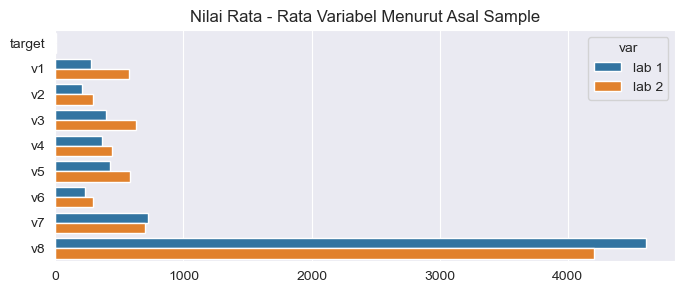

In [12]:
# groupby dataframe
df_lab = df.groupby('sample_type').mean()
df_lab = df_lab.T.reset_index()

# Mengonversi kolom variabel ke dalam satu kolom menggunakan metode melt
df_lab_melt = pd.melt(df_lab, id_vars=['index'], value_vars=df_lab.columns[1:3], var_name='var', value_name='val')

# figure  8 x 3
plt.figure(figsize=(8,3))
sns.barplot(y='index', x='val', hue='var', data=df_lab_melt)
plt.title('Nilai Rata - Rata Variabel Menurut Asal Sample')
plt.xlabel('')
plt.ylabel('')
plt.show()

#### Korelasi Kolom Target dengan Fitur
Setelah mengetahui distribusi data setiap kolom, penulis mencari informasi mengenai hubungan korelasi setiap kolom dengan kolom target. 

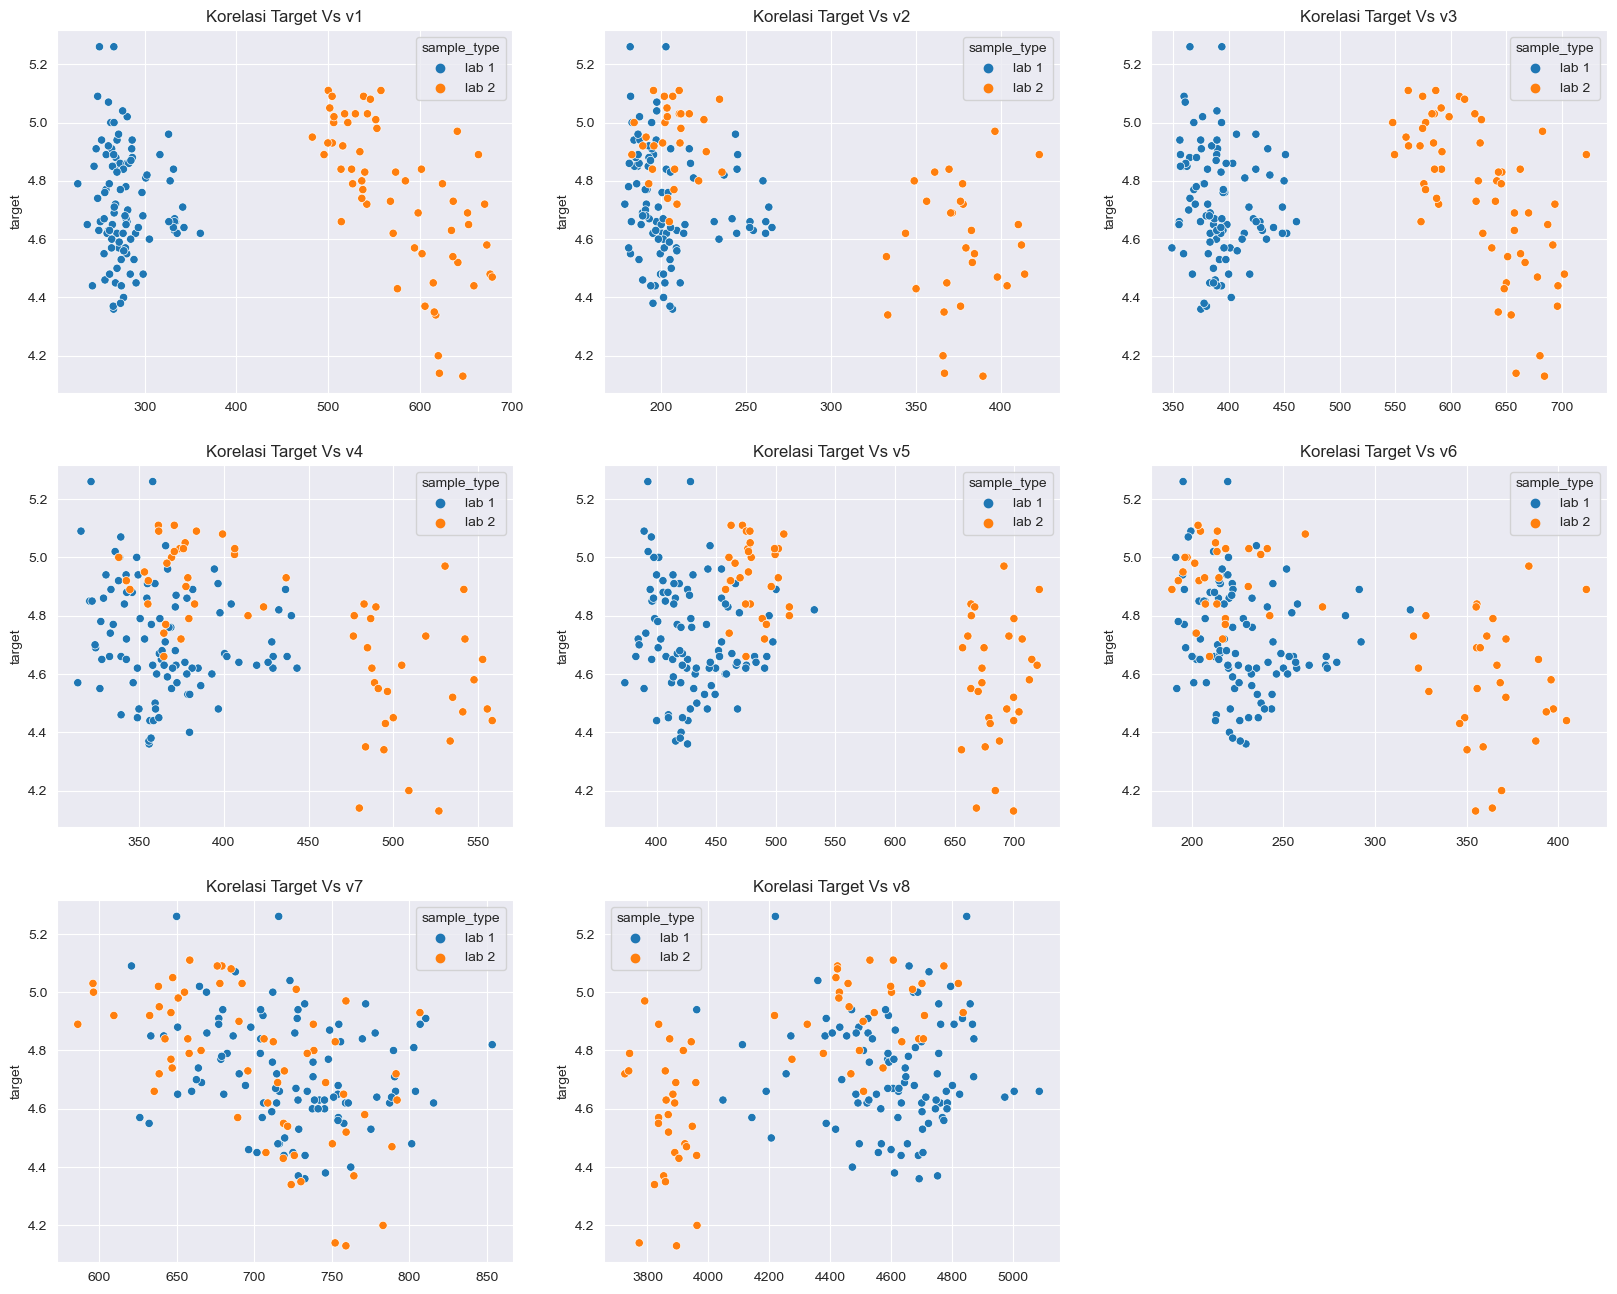

In [13]:
# Membuat figure untuk visualisasi
plt.figure(figsize=[20,16])
count = 331
# looping untuk melakukan plotting dengan seaborn
for i in df.columns[1:9]:
    plt.subplot(count)  # axes 
    sns.scatterplot(data=df, x=i, y=df['target'], hue=df['sample_type'])   # plot dengan seaborn sactterplot
    plt.title(f'Korelasi Target Vs {i}')
    plt.xlabel('')  # hapus label pada sumbu x
    count += 1  # axes baru untuk plot selanjutnya

Dengan menggunakan library `seaborn` dan tipe grafik `scatterplot`, berikut informasi yangn diperoleh :
- Dari kolom variabel `v1 - v8` tidak ada kolom yang memilik korelasi linear. Dapat dilihat pada setiap hasil plot bahwa semakin tinggi nilai pada suatu `variabel` (sumbu x) tidak menyebabkan peningkatan pada nilai `target` (sumbu y). Begitupun sebaliknya
- Namun dari sisi kolom sample type, ada beberapa yang memiiliki hubungan dengan kolom variabel.
    - Pada nilai variabel `v1` dan `v3`, sampel dari `laboratorium 1` memiliki nilai yang `lebih kecil` dari `laboratoium 2`
    - Sedangkan pada variabel `v2`, `v4`, `v5` dan `v6` juga memiliki kecenderungan bahwa sample dari laboratorium 1 lebih kecil dari laboratorium 2. `Namun` terdapat beberapa sample yang berasal dari `laboratorium 2 memiliki nilai variabel yang sama seperti dari sample laboratorium 1`
    - Untuk varibel `v7` `tidak memiliki korelasi` dengan `type sample`
    - Sedangkan variabel `v8` memiliki nilai variabel lebih besar dari `laboratorium 1` dibandingkan `laboratorium 2` meski terdapat beberapa sampel dari `laboratorium 2` juga memiliki nilai variabel yang menyerupai `laboratorium 1`

### Feature Selection
Tahap selanjutnya setelah analisa deskriptif adalah feature selection. 

Sebelumnya penulis telah mencari informasi mengenai korelasi setiap kolom dengan kolom target menggunakan `plot visualisasi`. Pada tahap ini penulis kembali ingin mencari `korelasi` antara semua kolom dengan kolom `target` namun dengan metodologi lain. Metode yang digunakan adalah `phi_k correlation`


In [14]:
# Cek nilai korelasi semua fitur dengan kolom target
val_phik = df.phik_matrix().target

interval columns not set, guessing: ['target', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8']


In [15]:
# Sort nilai korelasi phi_k secara descending
val_phik.sort_values(ascending=False)

target        1.00
v8            0.50
v6            0.48
v1            0.46
sample_type   0.42
v3            0.40
v5            0.38
v4            0.37
v2            0.37
v7            0.35
Name: target, dtype: float64

Nilai korelasi `phi_k` adalah `0 = tidak berkorelasi` dan `1 = sangat berkorelasi`.
Dari nilai ini penulis menentukan threshold `0.30` yang memiliki arti `minimal terdapat 30 percent koreleasi`
 
Dari hasil pengecekan diatas, `semua kolom` memiliki korelasi diatas `30%` sehingga semua kolom akan dipakai pada saat proses training

In [16]:
# membuat dataframe
df = df[['v1','v2', 'v3','v4', 'v5','v6', 'v7', 'v8', 'sample_type', 'target' ]]

## 4.4 - Feature Engineering

Setelah memperoleh fitur dan target beserta informasi mengenai distribusi datanya, maka langkah selanjutnya adalah melakukan preprocessing data

### Menentukan Fitur Numerical Atau Categorical

In [17]:
# Menentukan kolom numerikal dan kategorial

num_columns = df[df.columns[:-1]].select_dtypes(include=np.number).columns.tolist()
cat_columns = df[df.columns[:-1]].select_dtypes(include=np.object_).columns.tolist()

# print hasil kolom
print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8']
Categorical Columns :  ['sample_type']


Dari data diatas terlihat bahwa hanya 1 kolom yang mempunya data `kategorikal` yaitu kolom `sampel type`. 

Selebihnya merupakan kolom `numerikal`

### Splitting Train Test
Selanjutny adalah menyiapkan data train data test. 

Dengan menggunakan library `scikit learn` dan fungsi `train test split`, penulis membagi dataset menjadi data `train 80%` dan data `test 20%`. Alasan pemilihan persentase 80 : 20 karena keterbatasan dataset yang hanya berjumlah 160 baris. Sehingga dibutuhkan 

In [18]:
# Pisahkan data train dan data test dengan train test split
data_train, data_test = train_test_split(df, test_size=0.2, random_state=42)
print(f"train size : {data_train.shape}")
print(f"test size : {data_test.shape}")

train size : (128, 10)
test size : (32, 10)


In [19]:
# reset index
data_train = data_train.reset_index(drop=True)
data_test = data_test.reset_index(drop=True)

### Handling Outlier
Beberapa algoritma machine learning senstif terhadap outlier sehingga pelu dilakukan` handling outlier` pada `data train` berdasarkan `distribusi` datanya. 

Pengecekan distribusi data menggunakan fungsi `skweness`. Berikut adalah ketentuan nilai skewness :
- Nilai `-0.5 sd 0.5` merupakan `distribusi normal`
- Nilai skewn `< -0.5 sd > 0.5`merupakan distribusi `tidak normal`

Apabila distribusi data normal akan dilakukan pengecekan dengan metode Z-Score. Sedangkan jika tidak normal maka pengecekannya menggunakan Tukeys Rule

Berikut adalah fungsi untuk melakukan pengecekan outlier

In [20]:
# Define function to check outlier
def cek_outlier(data,col):
  # cek nilai skewness
  skew = data[col].skew()
  # jika distribusi normal menggunakan z-score
  if skew>=-0.5 and skew<=0.5:
    upper_boundary = data[col].mean() + 3*data[col].std()
    lower_boundary = data[col].mean() - 3*data[col].std()
  # jika tidak normal menggunakan tukeys rule
  else:
    Q1 = np.quantile(data[col], 0.25)
    Q3 = np.quantile(data[col], 0.75)
    IQR =  Q3 - Q1
    upper_boundary = Q3 + 1.5 * IQR
    lower_boundary = Q1 - 1.5 * IQR
  
  # slice outliers, data clean, dan hitung persen outlier
  outliers = data[(data[col]<lower_boundary) | (data[col]>upper_boundary)]
  data_clean = data[(data[col]>=lower_boundary) & (data[col]<=upper_boundary)]
  outliers_percent = len(outliers) / len(data) * 100

  return data_clean, outliers, outliers_percent

In [21]:
# Make variabel for feature with ouliers more and less than 5%
under_5 = []
over_5 = []

# Looping data train numerikal
for i in num_columns:
    _, outliers, outliers_percent = cek_outlier(data_train, i)
    if outliers_percent < 5:
        under_5.append(i)
    else:
        over_5.append(i)

# Print feature with outlier less than 5%
print(f'Kolom dengan persentase outlier Under 5 %')
for i in under_5:
    _, outliers, outliers_percent = cek_outlier(data_train, i)
    print(f'{i}  = {outliers_percent:.2f} %')

# Print feature with outlier more than 5%
print(f'\nKolom dengan persentase outlier Over 5 %')
for i in over_5:
    _, outliers, outliers_percent = cek_outlier(data_train, i)
    print(f'{i}  = {outliers_percent:.2f} %')

Kolom dengan persentase outlier Under 5 %
v1  = 0.00 %
v3  = 0.00 %
v7  = 0.00 %
v8  = 3.12 %

Kolom dengan persentase outlier Over 5 %
v2  = 18.75 %
v4  = 6.25 %
v5  = 18.75 %
v6  = 16.41 %


Setelah dilakukan pengecekan terdapat beberapa kolom yang memiliki persentase outlier dibawah 5 persen dan diatas 5 persen. Kolom dengan outlier dibawah 5% akan dilakukan trimming dan outlier diatas 5% akan dilakukan capping.

In [22]:
# Trimming outlier for column with outliers under 5%
data_train_clean, _, _ = cek_outlier(data_train, 'v8')

In [23]:
# Capping outliers for column with outliers over 5%
capper = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=['v2', 'v4', 'v5', 'v6', 'v8'])
capper.fit(data_train_clean)
data_train_clean = capper.transform(data_train)

In [24]:
# Looping data train celan
print('Persen Outlier Setelah Handling')
for i in num_columns:
    # cek persen outlier
    _, outliers, outliers_percent = cek_outlier(data_train_clean, i)
    print(f'{i}  = {outliers_percent:.2f} %')

Persen Outlier Setelah Handling
v1  = 0.00 %
v2  = 0.00 %
v3  = 0.00 %
v4  = 0.00 %
v5  = 0.00 %
v6  = 0.00 %
v7  = 0.00 %
v8  = 0.00 %


### Handling Missing Values
Seletah handling outlier, selanjutnya pengecekan missing value dan kemudian dilakukan handling apabila ditemukan missing value

In [25]:
# Check Missing Values pada data train
num_miss_val = 0
for i in data_train_clean:
    miss_val = data_train[i].isnull().sum()
    if miss_val > 0:
        print(i, ' : ', miss_val)
        print(f'Percentage of missing value {i} : {miss_val/len(data_train[i].values):.2f}%')
        num_miss_val += 1

if num_miss_val == 0:
    print('Tidak Ada Missing Value')

Tidak Ada Missing Value


In [26]:
# Check Missing Values pada data test
num_miss_val = 0
for i in data_test:
    miss_val = data_test[i].isnull().sum()
    if miss_val > 0:
        print(i, ' : ', miss_val)
        print(f'Percentage of missing value {i} : {miss_val/len(data_test[i].values):.2f}%')
        num_miss_val += 1

if num_miss_val == 0:
    print('Tidak Ada Missing Value')

Tidak Ada Missing Value


Dari pengecekan `data train` dan `data test` tidak ditemukan kolom yang memiliki `missing value`

### Splitting Fitur Target

Setelah dataset bersih dari outlier dan missing value, selanjutnya memisahkan `fitur` dengan `target` dari masing masing `data train` dan `data test`

In [27]:
# Split  `X` (Fitur) dan `y` (Target) pada Data Train

X_train = data_train_clean.drop('target', axis=1)
y_train = data_train_clean['target']
X_train.head(3)

,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
0,288.47,205.40,391.73,378.73,440.20,243.87,728.73,4417.73,lab 1
1,552.88,211.81,574.81,366.38,465.81,201.69,651.00,4428.31,lab 2
2,247.27,205.80,375.47,354.87,419.00,222.13,677.20,4386.80,lab 1


In [28]:
# Split  `X` (Fitur) dan `y` (Target) pada pada Data Test

X_test = data_test.drop('target', axis=1)
y_test = data_test['target']
X_test.head(3)

,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
0,499.93,195.67,561.87,361.33,472.00,203.67,658.53,4607.00,lab 2
1,495.33,182.93,549.53,344.53,457.87,189.20,586.27,4324.60,lab 2
2,614.19,368.38,650.25,500.06,678.69,349.00,707.56,3889.62,lab 2


### Feature Scaling
Kemudian dilakukan scalling pada data train yang berbentuk numerikal agar seluruh fitur memiliki range yang sama

In [29]:
# Tampilkan numerikal data train
X_train[num_columns].head(3)

,v1,v2,v3,v4,v5,v6,v7,v8
0,288.47,205.40,391.73,378.73,440.20,243.87,728.73,4417.73
1,552.88,211.81,574.81,366.38,465.81,201.69,651.00,4428.31
2,247.27,205.80,375.47,354.87,419.00,222.13,677.20,4386.80


Karena distribusi data pada fitur `numerikal` sudah `normal`, maka scaling dilakukan dengan menggunakan `StandarScaler` dari library Scikit-learn

In [30]:
# Feature Scaling using Standard Karena Distribusi Sudah Memiliki Distribusi Normal
# buat scaller
scaler = StandardScaler()
feature_names = scaler.get_feature_names_out(input_features=X_train[num_columns].columns)

# fit dan transform data train
X_train_num_scaled = scaler.fit_transform(X_train[num_columns])
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns=feature_names)

# transform data test
X_test_num_scaled = scaler.transform(X_test[num_columns])
X_test_num_scaled = pd.DataFrame(X_test_num_scaled, columns=feature_names)

# tampilkan hasil scaling
X_train_num_scaled.head(3)

,v1,v2,v3,v4,v5,v6,v7,v8
0,-0.69,-0.45,-0.75,-0.23,-0.46,-0.01,0.27,-0.19
1,1.09,-0.30,0.80,-0.45,-0.08,-0.98,-1.26,-0.15
2,-0.97,-0.44,-0.89,-0.66,-0.77,-0.51,-0.74,-0.29


### Feature Encoding
Pada fitur kategorikal yaitu sampel type, hanya memiliki 2 nilai unik (unik value). Sehingga proses encoding akan dilakukan menggunakan `Ordinal Encoder` dari library scikit-learn

In [31]:
# Tampilkan data train berbentuk string
X_train[cat_columns].head(3)

,sample_type
0,lab 1
1,lab 2
2,lab 1


In [32]:
# make ordinal encoder
ode = OrdinalEncoder()
# fit dan transform data train
X_train_ode = ode.fit_transform(X_train[cat_columns])
X_train_ode = pd.DataFrame(X_train_ode, columns=cat_columns)

# transform data test
X_test_ode = ode.transform(X_test[cat_columns])
X_test_ode = pd.DataFrame(X_test_ode, columns=cat_columns)

# tampilkan hasil encoding
X_train_ode.head(3)

,sample_type
0,0.00
1,1.00
2,0.00


### Making Final Data

Menggabungkan data numerikal yang sudah di scaling dan categorical yang sudah di encode

In [33]:
# Gabungkan kembali fitur numerikal dan kategorial
X_train_final = pd.concat([X_train_num_scaled, X_train_ode], axis=1)
X_test_final = pd.concat([X_test_num_scaled, X_test_ode], axis=1)

# tampilan data train final
X_train_final.head(3)

,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
0,-0.69,-0.45,-0.75,-0.23,-0.46,-0.01,0.27,-0.19,0.00
1,1.09,-0.30,0.80,-0.45,-0.08,-0.98,-1.26,-0.15,1.00
2,-0.97,-0.44,-0.89,-0.66,-0.77,-0.51,-0.74,-0.29,0.00


### Making Preprocessor
Untuk mempermudah proses fitur engineering pada proses parameter tuning dengan gridsearch atau randomsearch, maka penulis membuat preprocessor menggunakan Column Transformer dari library scikit-learn

In [34]:
# membuat preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("scale", scaler, num_columns),
        ('ode', ode, cat_columns),
        ])

# fit ke data train
preprocessor = preprocessor.fit(X_train)

## 4.5 - Model Selection

Untuk menentukan algoritma model yang akan di pakai, penulis melakukan fit dan predict menggunakan 6 algoritma machine learning. 

Metode scoring yang akan dipakai :
- `Mean Absolute Error ( MEA )` : Digunakan untuk mengukur besaran eror dari prediksi model terhadap nilai sebearnya dari target
- `R2 Scrore` : Digunakan untuk melihat bagaimana performa model dalam mengikuti pola dari data yang tersedia
- `Mean Absolute Percentage Error (MAPE)` : Mengitung persentase besar eror nilai prediksi terhadap nilai aktual

2 Model dengan performa terbaik akan di pilih untuk dilakukan hyper parameter tuning

In [35]:
# buat variabel untuk model
all_model = [LinearRegression(), SVR(), DecisionTreeRegressor(), RandomForestRegressor(),
 KNeighborsRegressor(),  GradientBoostingRegressor()]

# cek performa setiap model
for i in all_model:
    model = i
    model = model.fit(X_train_final, y_train)
    ypred = model.predict(X_train_final)
    y_pred_test = model.predict(X_test_final)
    print('-'*20, f'{i}','-'*20)
    print(f'MAE Train     : {mean_absolute_error(y_train, ypred):.4f}')
    print(f'MAPE Train: { mean_absolute_percentage_error(y_train, ypred)*100:.4f}%')
    print(f'R2 Score Train: { r2_score(y_train, ypred):.4f}')
    print(f'MAE Test     : {mean_absolute_error(y_test, y_pred_test):.4f}')
    print(f'MAPE Test     : {mean_absolute_percentage_error(y_test, y_pred_test):.4f}%')
    print(f'R2 Score Test: { r2_score(y_test, y_pred_test):.4f}\n')

-------------------- LinearRegression() --------------------
MAE Train     : 0.1342
MAPE Train: 2.8605%
R2 Score Train: 0.3231
MAE Test     : 0.1877
MAPE Test     : 0.0394%
R2 Score Test: 0.2087

-------------------- SVR() --------------------
MAE Train     : 0.1209
MAPE Train: 2.5753%
R2 Score Train: 0.4501
MAE Test     : 0.1786
MAPE Test     : 0.0377%
R2 Score Test: 0.1766

-------------------- DecisionTreeRegressor() --------------------
MAE Train     : 0.0000
MAPE Train: 0.0000%
R2 Score Train: 1.0000
MAE Test     : 0.1681
MAPE Test     : 0.0352%
R2 Score Test: 0.1646

-------------------- RandomForestRegressor() --------------------
MAE Train     : 0.0558
MAPE Train: 1.1866%
R2 Score Train: 0.8795
MAE Test     : 0.1686
MAPE Test     : 0.0353%
R2 Score Test: 0.3097

-------------------- KNeighborsRegressor() --------------------
MAE Train     : 0.1187
MAPE Train: 2.5228%
R2 Score Train: 0.4532
MAE Test     : 0.1813
MAPE Test     : 0.0380%
R2 Score Test: 0.1912

--------------------

Dari semua algoritma machine learning diatas, tidak diperoleh hasil yang cukup baik. Menurut personal jugdement penulis, Hal ini diakibatkan karena keterbatasan dari dataset.

Pada bagian sebelumnya telah diketahui bahwa dataset hanya berjumlah 160 baris. Oleh karena itu penulis ingin mencoba memperbanyak jumlah data namun tidak menghilangkan (berbeda) dari data aslinya.

Hal ini dapat dilakukan dengan menggunakan  library `Synthetic Data Vault`. Dari percobaan yang telah penulis lakukan, diperoleh dataset baru sebanyak 500 baris. Data ini tidak berbeda jauh dengan data asli. Tingkat kesesuaian data ini dengan data asli adalah `85%`. Hal ini dibuktikan dengan menggunakan metode evaluate dari libraty Synthetic Data Vault.

## Synthetic Data Vault

### Load Data
Berikut adalah proses load data sintetik dan pengecekan kesesuaian data asli dengan data sintetik

In [36]:
# load data sintetik
sd = pd.read_csv('sintetik.csv')
# evaluate data sintektik
print(f'Persentase Kesesuaian Data Sintetik dengan Data Asli : {evaluate(df, sd)*100:.2f}%')

Persentase Kesesuaian Data Sintetik dengan Data Asli : 85.49%


### Train Test Split
Setelah itu penulis membagi data sintetik menjadi data train dan data test

In [37]:
# split train dan test
X_train_sd, X_test_sd, y_train_sd, y_test_sd = train_test_split(sd.drop(columns='target'), sd.target, test_size=0.15, random_state=42)
print(f'X_train_sd Shape {X_train_sd.shape}')
print(f'X_test_sd Shape {X_test_sd.shape}')

X_train_sd Shape (425, 9)
X_test_sd Shape (75, 9)


### Preprocess Data Sintetik
Melakukan preprocess data train dengan menggunakan column transformer yang telah dibuat sebelumnya

In [38]:
# preprocess data
X_train_final_sd = preprocessor.transform(X_train_sd)
X_test_final_sd = preprocessor.transform(X_test_sd)
# ubah jadi dataframe
X_train_final_sd = pd.DataFrame(X_train_final_sd, columns=num_columns+cat_columns)
X_test_final_sd = pd.DataFrame(X_test_final_sd, columns=num_columns+cat_columns)
X_train_final_sd.head()

,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
0,-0.47,0.34,-0.01,0.13,-0.18,0.16,-1.35,0.39,0.00
1,0.73,0.83,0.11,-0.28,0.08,0.82,-0.17,0.08,0.00
2,1.20,3.82,1.43,2.24,2.16,1.71,0.65,-0.76,1.00
3,0.04,-0.14,0.02,-0.58,0.23,-0.05,-1.30,0.18,0.00
4,-0.61,-0.64,-0.92,-0.96,-0.44,-0.76,0.26,0.91,0.00


### Compare 6 Algorithm
Kemudian kembali membandingkan performa pada 6 algoritma untuk mencari 2 algoritma terbaik yang akan dilakukan proses tuning

In [39]:
# buat variabel untuk model
all_model = [LinearRegression(), SVR(), DecisionTreeRegressor(), RandomForestRegressor(),
 KNeighborsRegressor(),  GradientBoostingRegressor()]

# cek performa setiap model
for i in all_model:
    model = i
    model = model.fit(X_train_final_sd, y_train_sd)
    ypred = model.predict(X_train_final_sd)
    y_pred_test = model.predict(X_test_final_sd)
    print('-'*20, f'{i}','-'*20)
    print(f'MAE Train     : {mean_absolute_error(y_train_sd, ypred):.4f}')
    print(f'MAPE Train: { mean_absolute_percentage_error(y_train_sd, ypred)*100:.4f}%')
    print(f'R2 Score Train: { r2_score(y_train_sd, ypred):.4f}')
    print(f'MAE Test     : {mean_absolute_error(y_test_sd, y_pred_test):.4f}')
    print(f'MAPE Test     : {mean_absolute_percentage_error(y_test_sd, y_pred_test):.4f}%')
    print(f'R2 Score Test: { r2_score(y_test_sd, y_pred_test):.4f}\n')

-------------------- LinearRegression() --------------------
MAE Train     : 0.1241
MAPE Train: 2.6376%
R2 Score Train: 0.4905
MAE Test     : 0.1455
MAPE Test     : 0.0306%
R2 Score Test: 0.4882

-------------------- SVR() --------------------
MAE Train     : 0.1088
MAPE Train: 2.3097%
R2 Score Train: 0.6258
MAE Test     : 0.1368
MAPE Test     : 0.0288%
R2 Score Test: 0.5081

-------------------- DecisionTreeRegressor() --------------------
MAE Train     : 0.0000
MAPE Train: 0.0000%
R2 Score Train: 1.0000
MAE Test     : 0.1834
MAPE Test     : 0.0383%
R2 Score Test: 0.1227

-------------------- RandomForestRegressor() --------------------
MAE Train     : 0.0494
MAPE Train: 1.0491%
R2 Score Train: 0.9191
MAE Test     : 0.1437
MAPE Test     : 0.0302%
R2 Score Test: 0.4479

-------------------- KNeighborsRegressor() --------------------
MAE Train     : 0.1219
MAPE Train: 2.5825%
R2 Score Train: 0.5571
MAE Test     : 0.1601
MAPE Test     : 0.0335%
R2 Score Test: 0.3930

--------------------

Dari hasil diatas, Hasil terbaik diperoleh oleh algoritma `SVR dan Logistic Regression`.
Algoritma lainnya cukup bagus, namun sangat mengalami overfit. Model overfit tidak baik karena akan gagal untuk memprediksi data yang bervariasi

## 4.6 - Model Definition & Training

### Linear Regression dan SVR

In [40]:
# membuat linear model
linreg_model = LinearRegression()
linreg_model.fit(X_train_final_sd, y_train_sd)

# membuat SVR model
svr_model = SVR()
svr_model.fit(X_train_final_sd, y_train_sd)

SVR()

## 4.7 - Model Evaluation
Setelah Menentukan 2 model terbaik, penulis melakukan evaluasi terhadap data train dan data test

### Linear Regresi

In [41]:
# predik data train dan test dengan linear regresi
y_pred_train_linreg = linreg_model.predict(X_train_final_sd)
y_pred_test_linreg = linreg_model.predict(X_test_final_sd)
# tampilkan perbandingan metrik evaluasi antara data train dan test
print('-'*20, f'{linreg_model}','-'*20)
print(f'MAE Train       : {mean_absolute_error(y_train_sd, y_pred_train_linreg):.4f}')
print(f'MAE Test        : {mean_absolute_error(y_test_sd, y_pred_test_linreg):.4f}\n')
print(f'MAPE Train      : { mean_absolute_percentage_error(y_train_sd, y_pred_train_linreg)*100:.2f}%')
print(f'MAPE Test       : {mean_absolute_percentage_error(y_test_sd, y_pred_test_linreg):.2f}%\n')
print(f'R2 Score Train  : { r2_score(y_train_sd, y_pred_train_linreg):.4f}')
print(f'R2 Score Test   : { r2_score(y_test_sd, y_pred_test_linreg):.4f}\n')

-------------------- LinearRegression() --------------------
MAE Train       : 0.1241
MAE Test        : 0.1455

MAPE Train      : 2.64%
MAPE Test       : 0.03%

R2 Score Train  : 0.4905
R2 Score Test   : 0.4882



Rata rata nilai eror dari prediksi `(MAE)` terhadap data test adalah `0.1455`. Nilai ini cukup kecil jika di bandingkan dengan range nilai target. Untuk lebih spesifik dapat dilihat pada nilai `MAPE`. Persentase rata rata error adalah `0.03%`. Persentase ini membuktikan bahwa nilai eror 0.1455 sudah cukup kecil.

Sedangkan Nilai R2 Score menunjukkan bagaimana model mengikuti pola dari dataset yang dipelajari. Ranga nilai R2 Score adalahh antara minus tak hingga sampai dengan 1 dan 1 merupakan saat model berhasil secara sempurna mengikuti pola. Nilai R2 Score pada data train `0.4882` berarti model berhasil mengikuti pola data sebesar 48%. Ini brarti Model belum berhasil mengikuti pola data secara baik `(Underfit)`

Untuk perbandingan performa pada data train dan data test sudah cukup baik dengan perbedaan `R2 score` dibawah `1%`

### Support Verctor Regressor (SVR)

In [42]:
# predik data train dan test dengan svr
y_pred_train_svr = svr_model.predict(X_train_final_sd)
y_pred_test_svr = svr_model.predict(X_test_final_sd)
# tampilkan perbandingan metrik evaluasi antara data train dan test
print('-'*20, f'{svr_model}','-'*20)
print(f'MAE Train       : {mean_absolute_error(y_train_sd, y_pred_train_svr):.4f}')
print(f'MAE Test        : {mean_absolute_error(y_test_sd, y_pred_test_svr):.4f}\n')
print(f'MAPE Train      : { mean_absolute_percentage_error(y_train_sd, y_pred_train_svr)*100:.2f}%')
print(f'MAPE Test       : {mean_absolute_percentage_error(y_test_sd, y_pred_test_svr):.2f}%\n')
print(f'R2 Score Train  : { r2_score(y_train_sd, y_pred_train_svr):.4f}')
print(f'R2 Score Test   : { r2_score(y_test_sd, y_pred_test_svr):.4f}\n')

-------------------- SVR() --------------------
MAE Train       : 0.1088
MAE Test        : 0.1368

MAPE Train      : 2.31%
MAPE Test       : 0.03%

R2 Score Train  : 0.6258
R2 Score Test   : 0.5081



Rata rata nilai eror dari prediksi `(MAE)` terhadap data test adalah `0.1366`. Nilai ini cukup kecil jika di bandingkan dengan range nilai target. Untuk lebih spesifik dapat dilihat pada nilai `MAPE`. Persentase rata rata error adalah `0.03%`. Persentase ini membuktikan bahwa nilai eror 0.1366 sudah cukup kecil.

Sedangkan Nilai R2 Score menunjukkan bagaimana model mengikuti pola dari dataset yang dipelajari. Ranga nilai R2 Score adalahh antara minus tak hingga sampai dengan 1 dan 1 merupakan saat model berhasil secara sempurna mengikuti pola. Nilai R2 Score pada data train `0.5107` berarti model berhasil mengikuti pola data sebesar 51%. Nilai `51%` masih tergolong belum cukup baik atau boleh dikatakan `Underfit`.

Namun, untuk perbandingan performa pada data train dan data test belum cukup baik dengan perbedaan `R2 score` sekitar `10%`
Oleh karena itu akan dilakukan Hyperparameter tuning.

## 4.8 - Hyperparameter Tuning

### Linear Regresi
Dengan parameter baseline hasil yang diperoleh bahwa model `underfit` dengan r2 score 0.48. Penulis mencoba meningkatkan performa model dengan menambah kompleksitas model dengan cara mengubah bentuk data dari `linear` menjadi `polynominal`. Namun Untuk mengatasi overfitting karena menambah kompleksitas model, penulis memberikan `penalty` dengan `L2 penalty` atau Ridge.

Berikut adalah pipeline dari model `ridge` dengan transformasi `polynominal` menggunakan PolynominalFeatures

In [43]:
# membuat pipeline svr
ridge_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('poly', PolynomialFeatures()),
                                 ('ridge', Ridge())])

Setelah membuat pipeline, penulis menentukan kombinasi parameter yang akan dipakai pada proses gridsearch
- Ridge_apha : Besar nilai pinalty yang diberikan. Penulis menentukan dari 1 sampai dengan 20
- Poly_degree : Transformasi data kebentuk persamaan non linear. Penulis menentukan persamaan pangkat 2 atau pangkat 3.
- Interaction Only dan Include Bias : Gridsearch akan memilih apakah akan mengikutsetakan interaction dan bias atau tidak

In [44]:
# Make parameter for ridge
param_grid_ridge = {'ridge__alpha': [int(x) for x in np.linspace(start=1, stop=20, num=20)],
              'poly__degree' : [2,3],
              'poly__interaction_only' : [True, False],
              'poly__include_bias': [True, False]
              }

# grid search dengan pipeline dan parameters
grid_ridge = GridSearchCV(ridge_pipeline, param_grid=param_grid_ridge, cv=3, n_jobs=-1, scoring='r2', verbose=1)
grid_ridge.fit(X_train_sd, y_train_sd)

Fitting 3 folds for each of 160 candidates, totalling 480 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('scale',
                                                                         StandardScaler(),
                                                                         ['v1',
                                                                          'v2',
                                                                          'v3',
                                                                          'v4',
                                                                          'v5',
                                                                          'v6',
                                                                          'v7',
                                                                          'v8']),
                                                                        ('ode',
                              

In [45]:
# tampilkan hasil grid search
print(f'Ridge Grid Search Best Score : {grid_ridge.best_score_}')
print(f'Ridge Grid Search Best Parameter : {grid_ridge.best_params_}')

Ridge Grid Search Best Score : 0.44500388663374296
Ridge Grid Search Best Parameter : {'poly__degree': 2, 'poly__include_bias': False, 'poly__interaction_only': False, 'ridge__alpha': 20}


Dari Hasil gridsearch diperoleh bahwa parameter terbaik sebagai berikut  :
- degree : 2
- include_bias : False
- interaction_only : False
- ridge__alpha : 20

Kemudian penulis melakukan prediksi pada data train dan data test


In [46]:
# predik data train dan test dengan grid ridge
y_pred_train_grid_ridge = grid_ridge.predict(X_train_sd)
y_pred_test_grid_ridge = grid_ridge.predict(X_test_sd)
# tampilkan perbandingan metrik evaluasi antara data train dan test
print('-'*20, f'{Ridge()}','-'*20)
print(f'MAE Train       : {mean_absolute_error(y_train_sd, y_pred_train_grid_ridge):.4f}')
print(f'MAE Test        : {mean_absolute_error(y_test_sd, y_pred_test_grid_ridge):.4f}\n')
print(f'MAPE Train      : { mean_absolute_percentage_error(y_train_sd, y_pred_train_grid_ridge)*100:.2f}%')
print(f'MAPE Test       : {mean_absolute_percentage_error(y_test_sd, y_pred_test_grid_ridge):.2f}%\n')
print(f'R2 Score Train  : { r2_score(y_train_sd, y_pred_train_grid_ridge):.4f}')
print(f'R2 Score Test   : { r2_score(y_test_sd, y_pred_test_grid_ridge):.4f}\n')

-------------------- Ridge() --------------------
MAE Train       : 0.1189
MAE Test        : 0.1359

MAPE Train      : 2.52%
MAPE Test       : 0.03%

R2 Score Train  : 0.5414
R2 Score Test   : 0.5349



### SVR
Dengan parameter baseline, diperoleh hasil bahwa SVR mengalami `overfit` dengan selisih R2 Score pada data train dan data test sebesar `10%.` Oleh karena itu penulis akan melakukan gridsearch untuk mencari performa yang lebih optimal

Berikut adalah pipeline untuk gridsearch SVR

In [47]:
# membuat pipeline svr
svr_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('svr', SVR())])

In [48]:
# Make parameter for svr
param_grid_svr = {'svr__C': [1, 2, 3, 4, 5],
              'svr__gamma': ['auto', 'scale'],
              'svr__degree' : [1,2,3,4],
              'svr__kernel' : ['poly', 'linear', 'rbf', 'sigmoid'],
              'svr__epsilon': [0.001, 0.01, 0.1, 1]}

# grid search dengan pipeline dan parameters
grid_svr = GridSearchCV(svr_pipeline, param_grid=param_grid_svr, cv=3, n_jobs=-1, scoring='r2', verbose=1)
grid_svr.fit(X_train_sd, y_train_sd)

Fitting 3 folds for each of 640 candidates, totalling 1920 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('scale',
                                                                         StandardScaler(),
                                                                         ['v1',
                                                                          'v2',
                                                                          'v3',
                                                                          'v4',
                                                                          'v5',
                                                                          'v6',
                                                                          'v7',
                                                                          'v8']),
                                                                        ('ode',
                              

In [49]:
# tampilkan hasil grid search
print(f'SVR Grid Search Best Score : {grid_svr.best_score_}')
print(f'SVR Grid Search Best Parameter : {grid_svr.best_params_}')

SVR Grid Search Best Score : 0.4603558873882994
SVR Grid Search Best Parameter : {'svr__C': 1, 'svr__degree': 1, 'svr__epsilon': 0.1, 'svr__gamma': 'auto', 'svr__kernel': 'poly'}


Dari Hasil gridsearch diperoleh bahwa parameter terbaik sebagai berikut  :
- C : 1 
- degree : 1 
- epsilon : 0.1 
- gamma :  auto  
- kernel :  poly 

Kemudian penulis melakukan prediksi pada data train dan data test


In [50]:
# predik data train dan test dengan grid svr
y_pred_train_grid_svr = grid_svr.predict(X_train_sd)
y_pred_test_grid_svr = grid_svr.predict(X_test_sd)
# tampilkan perbandingan metrik evaluasi antara data train dan test
print('-'*20, f'{SVR()}','-'*20)
print(f'MAE Train       : {mean_absolute_error(y_train_sd, y_pred_train_grid_svr):.4f}')
print(f'MAE Test        : {mean_absolute_error(y_test_sd, y_pred_test_grid_svr):.4f}\n')
print(f'MAPE Train      : { mean_absolute_percentage_error(y_train_sd, y_pred_train_grid_svr)*100:.2f}%')
print(f'MAPE Test       : {mean_absolute_percentage_error(y_test_sd, y_pred_test_grid_svr):.2f}%\n')
print(f'R2 Score Train  : { r2_score(y_train_sd, y_pred_train_grid_svr):.4f}')
print(f'R2 Score Test   : { r2_score(y_test_sd, y_pred_test_grid_svr):.4f}\n')

-------------------- SVR() --------------------
MAE Train       : 0.1246
MAE Test        : 0.1472

MAPE Train      : 2.65%
MAPE Test       : 0.03%

R2 Score Train  : 0.4875
R2 Score Test   : 0.4818



## 4.9 - Model Comparation On Data Test
Setelah memperoleh model hasil tuning, penulis membandingkan performa baseline dengan hasil tuning pada algoritma yang sama pada data test. Kemudian membandingkan model terbaik dari kedua algoritma untuk memilih model yang akan di pakai pada data inference

### Linear Rregresi

In [51]:
# mae
print('-'*5, f'Mean Absolute Error (MAE)','-'*5)
print(f'Linear Rregresi : {mean_absolute_error(y_test_sd, y_pred_test_linreg):.4f}')
print(f'Ridge           : {mean_absolute_error(y_test_sd, y_pred_test_grid_ridge):.4f}\n')
# mape
print('-'*5, f'Mean Absolute Percentage Error (MAPE)','-'*5)
print(f'Linear Rregresi : {mean_absolute_percentage_error(y_test_sd, y_pred_test_linreg):.4f}%')
print(f'Ridge           : {mean_absolute_percentage_error(y_test_sd, y_pred_test_grid_ridge):.4f}%\n')
# r2 score
print('-'*5, f'R2 Score','-'*5)
print(f'Linear Rregresi : {r2_score(y_test_sd, y_pred_test_linreg):.4f}')
print(f'Ridge           : {r2_score(y_test_sd, y_pred_test_grid_ridge):.4f}\n')

----- Mean Absolute Error (MAE) -----
Linear Rregresi : 0.1455
Ridge           : 0.1359

----- Mean Absolute Percentage Error (MAPE) -----
Linear Rregresi : 0.0306%
Ridge           : 0.0286%

----- R2 Score -----
Linear Rregresi : 0.4882
Ridge           : 0.5349



Pada algoritma linear regresi, diperoleh bahwa model hasil tuning yaitu `ridge` memiliki performa lebih baik pada ketiga metrik evaluasi. 

### SVR

In [52]:
# mae
print('-'*5, f'Mean Absolute Error (MAE)','-'*5)
print(f'SVR Baseline : {mean_absolute_error(y_test_sd, y_pred_test_svr):.4f}')
print(f'SVR Tuned    : {mean_absolute_error(y_test_sd, y_pred_test_grid_svr):.4f}\n')
# mape
print('-'*5, f'Mean Absolute Percentage Error (MAPE)','-'*5)
print(f'SVR Baseline : {mean_absolute_percentage_error(y_test_sd, y_pred_test_svr):.4f}%')
print(f'SVR Tuned    : {mean_absolute_percentage_error(y_test_sd, y_pred_test_grid_svr):.4f}%\n')
# r2 score
print('-'*5, f'R2 Score','-'*5)
print(f'SVR Baseline : {r2_score(y_test_sd, y_pred_test_svr):.4f}')
print(f'SVR Tuned    : {r2_score(y_test_sd, y_pred_test_grid_svr):.4f}\n')

----- Mean Absolute Error (MAE) -----
SVR Baseline : 0.1368
SVR Tuned    : 0.1472

----- Mean Absolute Percentage Error (MAPE) -----
SVR Baseline : 0.0288%
SVR Tuned    : 0.0309%

----- R2 Score -----
SVR Baseline : 0.5081
SVR Tuned    : 0.4818



Pada algoritma SVR, diperoleh bahwa model hasil tuning yaitu SVR memiliki performa lebih baik pada ketiga metrik evaluasi. Namun karena pada pengecekan sebelumnya mode SVR mengalami overfit yang cukup besar, maka penulis memutuskan untuk menggunakan model `SVR Tuned` sebagai yang terbaik

### Ridge VS SVR

In [53]:
# mae
print('-'*5, f'Mean Absolute Error (MAE)','-'*5)
print(f'Ridge        : {mean_absolute_error(y_test_sd, y_pred_test_grid_ridge):.4f}')
print(f'SVR Tuned    : {mean_absolute_error(y_test_sd, y_pred_test_grid_svr):.4f}\n')
# mape
print('-'*5, f'Mean Absolute Percentage Error (MAPE)','-'*5)
print(f'Ridge        : {mean_absolute_percentage_error(y_test_sd, y_pred_test_grid_ridge):.4f}%')
print(f'SVR Tuned    : {mean_absolute_percentage_error(y_test_sd, y_pred_test_grid_svr):.4f}%\n')
# r2 score
print('-'*5, f'R2 Score','-'*5)
print(f'Ridge        : {r2_score(y_test_sd, y_pred_test_grid_ridge):.4f}')
print(f'SVR Tuned    : {r2_score(y_test_sd, y_pred_test_grid_svr):.4f}\n')

----- Mean Absolute Error (MAE) -----
Ridge        : 0.1359
SVR Tuned    : 0.1472

----- Mean Absolute Percentage Error (MAPE) -----
Ridge        : 0.0286%
SVR Tuned    : 0.0309%

----- R2 Score -----
Ridge        : 0.5349
SVR Tuned    : 0.4818



Kemudian antara model Ridge dan SVR Tuned, Diperoleh bahwa performa model Rigde lebih baik dengan perincian sebagai berikut :
- Mean Absolute Error (MAE) : 0.1359
- Mean Absolute Percentage Error (MAPE) : 0.0286%
- R2 Score : 0.5349

## 4.10 - Model Saving
Setelah model penulis anggap maksimal maka selanjutnya adalah proses penyimpanan model sehingga dapat di gunakan tanpa harus di lakukan train kembali.

In [54]:
# Model ridge
with open('ridge_model.pkl', 'wb') as file_1:
  pickle.dump(grid_ridge, file_1)

## 4.11 Model Inference
Kemudian penuli mencoba membuat data baru dan melakukan prediksi untuk mencoba model pada data inference

In [55]:
# buat data inf
np.random.seed(42)
v1 = np.random.uniform(227.0, 678.0, 10)
v2 = np.random.uniform(178.0, 422.0, 10)
v3 = np.random.uniform(348.0, 722.0, 10)
v4 = np.random.uniform(313.0, 558.0, 10)
v5 = np.random.uniform(373.0, 721.0, 10)
v6 = np.random.uniform(189.0, 397.0, 10)
v7 = np.random.uniform(586.0, 853.0, 10)
v8 = np.random.uniform(3725.0, 5086.0, 10)
sample_type_cat = ['lab 1', 'lab 2']
sample_type = np.random.choice(sample_type_cat, size=10)

# Buat menjadi dataframe
data_inf = pd.DataFrame({'v1': v1, 'v2': v2, 'v3': v3, 'v4': v4, 'v5': v5, 'v6': v6,'v7' : v7, 'v8' : v8, 'sample_type' : sample_type})
data_inf


,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
0,395.92,183.02,576.83,461.85,415.47,390.67,689.78,4776.03,lab 1
1,655.77,414.66,400.17,354.78,545.32,350.23,658.45,3995.45,lab 1
2,557.13,381.12,457.26,328.94,384.97,384.42,807.27,3732.52,lab 2
3,496.99,229.81,485.02,545.48,689.44,375.12,681.25,4834.84,lab 2
4,297.36,222.37,518.57,549.58,463.06,313.36,661.01,4687.03,lab 2
5,297.35,222.75,641.66,511.06,603.56,380.75,730.90,4717.18,lab 1
6,253.20,252.24,422.68,387.63,481.48,207.41,623.63,4774.70,lab 2
7,617.65,306.04,540.32,336.93,553.98,229.76,800.19,3825.77,lab 1
8,498.10,283.39,569.56,480.64,563.26,198.41,605.91,4212.87,lab 1
9,546.34,249.06,365.37,420.84,437.33,256.67,849.50,3882.70,lab 2


In [56]:
# Predict data inf dengan model ridge
y_pred_inf = grid_ridge.predict(data_inf)

# buat prediksi jadi dataframe
y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['Plant Nutrion Prediction'])

# Concate prediction with data inference
data_inf_pred = pd.concat([data_inf ,y_pred_inf_df],axis=1)

# Showing data inf and Prediction
data_inf_pred

,v1,v2,v3,v4,v5,v6,v7,v8,sample_type,Plant Nutrion Prediction
0,395.92,183.02,576.83,461.85,415.47,390.67,689.78,4776.03,lab 1,4.85
1,655.77,414.66,400.17,354.78,545.32,350.23,658.45,3995.45,lab 1,4.51
2,557.13,381.12,457.26,328.94,384.97,384.42,807.27,3732.52,lab 2,4.41
3,496.99,229.81,485.02,545.48,689.44,375.12,681.25,4834.84,lab 2,4.95
4,297.36,222.37,518.57,549.58,463.06,313.36,661.01,4687.03,lab 2,4.65
5,297.35,222.75,641.66,511.06,603.56,380.75,730.90,4717.18,lab 1,4.72
6,253.20,252.24,422.68,387.63,481.48,207.41,623.63,4774.70,lab 2,4.93
7,617.65,306.04,540.32,336.93,553.98,229.76,800.19,3825.77,lab 1,4.64
8,498.10,283.39,569.56,480.64,563.26,198.41,605.91,4212.87,lab 1,4.99
9,546.34,249.06,365.37,420.84,437.33,256.67,849.50,3882.70,lab 2,4.54


# 5 - Conclusion / Overall Analysis
## Model Analysis
### Linear Regresi dan Ridge Regresi
Beberapa analisa dari model :
- Pada model baseline linear regresi performa model cukup baik dengan MAE dan MAPE yang cukup kecil namun model hanya mampu mnengikuti pola data sebesar 48%
- Setelah dilakukan polynominal transform dan diberikan penalty dengan ridge, performa model meningkat dengan kemampuan model mengikuti pola data menjadi 53%

Kelebihan dan Kelemahan model Ridge Regresi adalah:
- Kelebihan :
    - Akurasi cukup baik dengan rata - rata persentase eror kecil pada data test. Hanya 0.0286%
    - Kompleksitas model yang rendah membuat model memiliki waktu process yang rendah dan penggunaan storage yang sedikit.
- Kekurangan
    - Kurang baik dalam mengikuti pola data. Kemampuan model masih sebesar 53% dalam mengikuti pola data

### Support Vector Regresi (SVR)
Beberapa analisa dari model :
- Pada model baseline performa model cukup baik dengan MAE dan MAPE yang cukup kecil dan model mampu mengikuti pola data sebesar 62% pada data train dan 51% pada data test. Hal ini menunjukan bahwa model kurang mampu memprediksi secara general (`overfit`)
- Setelah dilakukan hyper parameter tuning dengan menggunakan gridsearch , performa model sedikit menurun namun mampu memprediksi secara general dengan performa yang serupa pada pada train dan data test.

Kelebihan dan Kelemahan model SVR adalah:
- Kelebihan :
    - Akurasi cukup baik dengan rata - rata persentase eror kecil pada data test. Hanya 0.0309%
- Kekurangan
    - Kurang baik dalam mengikuti pola data. Kemampuan model masih sebesar 48% dalam mengikuti pola data

### Final Model
Dari hasil evaluasi maka model yang terbaik dan digunakan dalam prediksi data inference adalah model `Ridge Regresi`

### Further Improvement
- Memperbanyak dataset secara alami
- Mencoba metode upsampling lain yang memiliki performa lebih baik dari Synthetic Data Vault
- Mencoba lebih banyak kombinasi parameters pada saat hyperparameter tuning

## Overall Analysis
### Secara keseluruhan proses yang dilakukan pada project ini adalah:
- Import semua library yang di butuhkan
- Load dataset dan eksplorasi basic info dari data
- Exploarsi Data Analytics untuk menemukan insight. 
    - Cek missing value dan data duplikat
    - Analisa deskriptif
    - Distribusi data setiap kolom
    - Korelasi kolom dengan target
    - Fitur Selection
- Fitur Engineering dimana pada tahap ini melakukan beberapa hal seperti :
    - Split data train dan data test
    - Handling outlier
    - Feature Scaling
    - Feature Encoding
    - Membuat trasnformer data preprosesor
- Model Selection
    - Membandingkan 6 Algoritma machine learning
    - Up sample data dengan Synthetic Data Vault
    - Membandingkan 6 Algoritma pada data sintetik
- Model Definition dan Model Training
- Evaluasi model dengan menggunakan metrik evaluasi mean absolute error(MAE), mean absolute percentage error(MAPE), dan R2 Score
- Hyperparameter Tuning
- Membandingkan model baseline dan model setelah tuning
- Model Saving
- Forecasting Inference dengan data baru
- Pengambilan kesimpulan
    - Analisis model
    - Kelebihan dan kekurangan model
    - Futher Improvement